In [1]:
import matplotlib.pyplot as plt
import rasterio
import numpy as np
import pandas as pd

from rasterio.plot import show, show_hist
from rasterio.transform import from_origin
from sklearn.cluster import KMeans
from matplotlib.colors import ListedColormap

## Loading, exploration and visualization

#### Load data

In [2]:
image_2018 = r"vraz_wheat_2018-05-26_EVI.tiff"
image_2018 = rasterio.open(image_2018) # ukládá se jako objekt (ne jako np. array)
image_2019 = r"vraz_wheat_2019-06-10_EVI.tiff"
image_2019 = rasterio.open(image_2019)
image_2020 = r"vraz_corn_2020-08-21_EVI.tiff"
image_2020 = rasterio.open(image_2020)
image_2021 = r"vraz_wheat_2021-06-04_EVI.tiff"
image_2021 = rasterio.open(image_2021)
image_2022 = r"vraz_corn_2022-07-17_EVI.tiff"
image_2022 = rasterio.open(image_2022)

#### Create arrays 

In [3]:
image_2018_array = image_2018.read() # np array
image_2019_array = image_2019.read()
image_2020_array = image_2020.read()
image_2021_array = image_2021.read()
image_2022_array = image_2022.read()

#### Description, metadata

In [4]:
image_2018.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': -998.0,
 'width': 63,
 'height': 70,
 'count': 1,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(0.00013713737765452458, 0.0, 14.338228488329538,
        0.0, -9.094373465511646e-05, 48.9933315192015)}

In [5]:
# metadata 1
image_2018.name
image_2018.count
image_2018.width
image_2018.height
image_2018.shape # rows and columns
image_2018.crs # coordinate system
image_2018.transform
image_2018.descriptions
image_2018.count # dá počet kanálů

1

In [6]:
# metadata 2
image_2018_array.size # size of np.array (bity)
image_2018_array.dtype
image_2018_array.min()
image_2018_array.max()

0.70632565

### Input data exploration

In [7]:
# give me basic data statistics of a numpy array
def array_data_exploration(my_array):
    my_array_cleaned = my_array[my_array !=-998] # drop all the '-998' values
    array_min = np.min(my_array_cleaned)
    array_max = np.max(my_array_cleaned)
    array_mean = np.mean(my_array_cleaned)
    array_st_dev = np.std(my_array_cleaned)
    return array_min, array_max, array_mean, array_st_dev 

#### get basic data statistics, create a data frame

In [8]:
# create a data frame
array_statistics_df = pd.DataFrame(columns=['Min', 'Max', 'Mean', 'Std Dev'])

# arrays to go through
arrays = [image_2018_array, image_2019_array, image_2020_array, image_2021_array, image_2022_array]

# go through arrays, return data
for i, array in enumerate(arrays):
    array_min, array_max, array_mean, array_st_dev = array_data_exploration(array)
    array_statistics_df.loc[i] = [array_min, array_max, array_mean, array_st_dev]

# rename index
new_index_names = ['2018 - wheat', '2019 - wheat', '2020 - corn', '2021 - wheat', '2022 - corn']
array_statistics_df.index = new_index_names

# pivot table
array_statistics_df = array_statistics_df.T 

# round values
array_statistics_df = array_statistics_df.round(3)

array_statistics_df

,2018 - wheat,2019 - wheat,2020 - corn,2021 - wheat,2022 - corn
Min,0.233,0.346,0.349,0.454,0.254
Max,0.706,0.755,0.698,0.882,0.766
Mean,0.608,0.672,0.602,0.740,0.582
Std Dev,0.055,0.045,0.062,0.066,0.124


## Vizualization

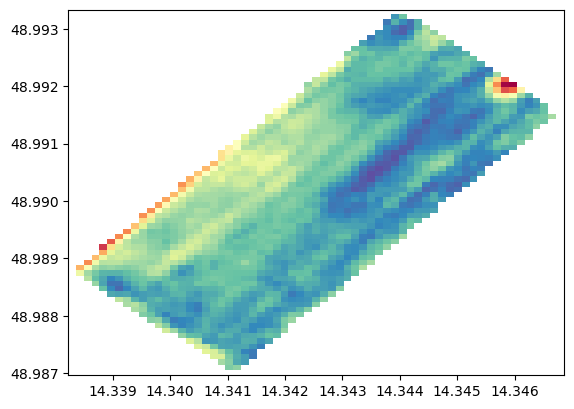

<AxesSubplot:>

In [9]:
# basic vizualization
show(image_2018, cmap='Spectral') 

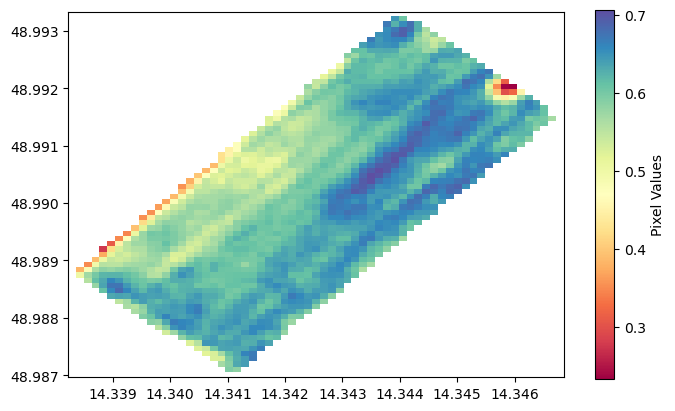

In [10]:
# Vizualization of the image and scale
fig, ax = plt.subplots(figsize=(8, 6))
show(image_2018, ax=ax, cmap='Spectral')

# Add a colorbar
cbar = plt.colorbar(ax.images[0], ax=ax, shrink = 0.8)
cbar.set_label('Pixel Values')  

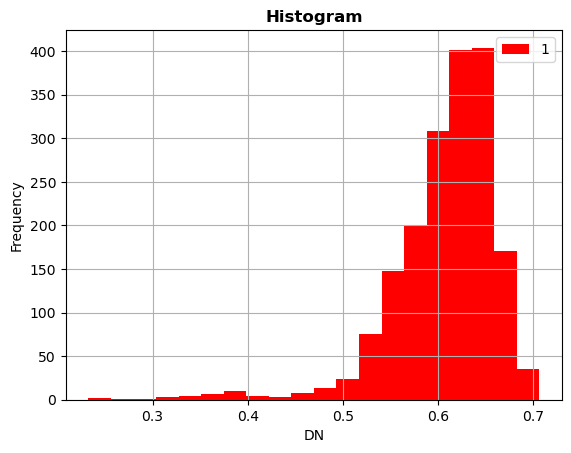

In [11]:
show_hist(image_2018, bins=20)

### Vizualize initial data
- can't do "globaly" in rasterio :/

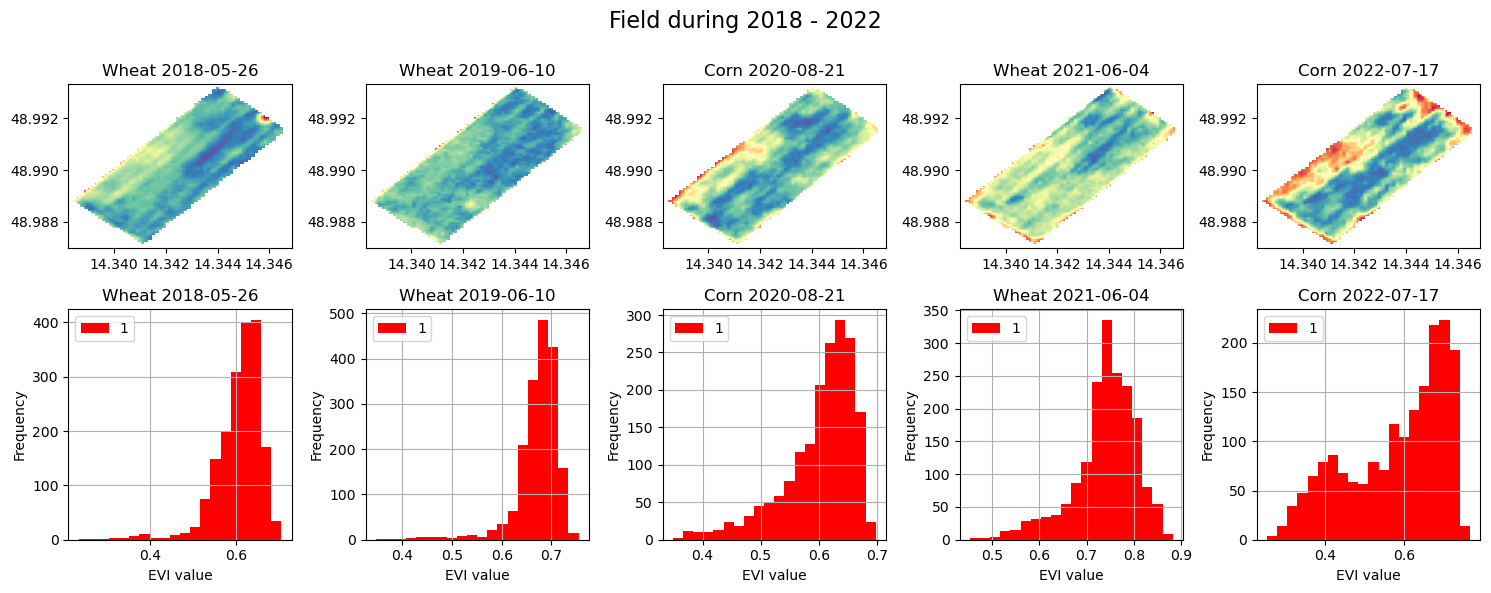

In [12]:
# Create a figure with subplots
fig, ax = plt.subplots(2, 5, figsize=(15, 6))  

# show images, set titles
show(image_2018, ax=ax[0,0], cmap='Spectral') 
show(image_2019, ax=ax[0,1], cmap='Spectral') 
show(image_2020, ax=ax[0,2], cmap='Spectral') 
show(image_2021, ax=ax[0,3], cmap='Spectral') 
show(image_2022, ax=ax[0,4], cmap='Spectral')
ax[0,0].set_title('Wheat 2018-05-26')
ax[0,1].set_title('Wheat 2019-06-10')
ax[0,2].set_title('Corn 2020-08-21')
ax[0,3].set_title('Wheat 2021-06-04')
ax[0,4].set_title('Corn 2022-07-17')

# show histograms
show_hist(image_2018, ax=ax[1,0],bins=20)
show_hist(image_2019, ax=ax[1,1],bins=20)
show_hist(image_2020, ax=ax[1,2],bins=20)
show_hist(image_2021, ax=ax[1,3],bins=20)
show_hist(image_2022, ax=ax[1,4],bins=20)

# set title to histograms and change legend position (can't do globaly in rasterio:()
ax[1,0].set_title('Wheat 2018-05-26')
ax[1,0].legend(loc='upper left')
ax[1,0].set_xlabel('EVI value')
ax[1,1].set_title('Wheat 2019-06-10')
ax[1,1].legend(loc='upper left') 
ax[1,1].set_xlabel('EVI value')
ax[1,2].set_title('Corn 2020-08-21')
ax[1,2].legend(loc='upper left') 
ax[1,2].set_xlabel('EVI value')
ax[1,3].set_title('Wheat 2021-06-04')
ax[1,3].legend(loc='upper left')
ax[1,3].set_xlabel('EVI value')
ax[1,4].set_title('Corn 2022-07-17')
ax[1,4].legend(loc='upper left') 
ax[1,4].set_xlabel('EVI value')

# title
fig.suptitle('Field during 2018 - 2022', fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()

#### Calculate and vizualize the mean and standart deviation

In [13]:
# calculate mean using numpy
image_mean = np.mean((image_2018_array, image_2019_array, image_2020_array, image_2021_array, image_2022_array), axis = 0)
image_mean_to_table = image_mean # save to work with later

In [14]:
# calculate standart deviation using numpy
image_std_dev = np.std((image_2018_array, image_2019_array, image_2020_array, image_2021_array, image_2022_array), axis = 0)

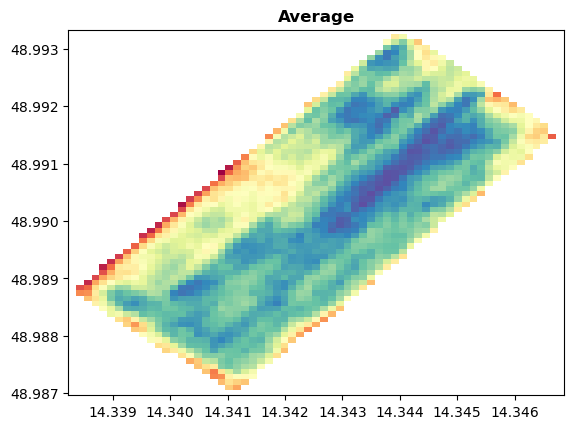

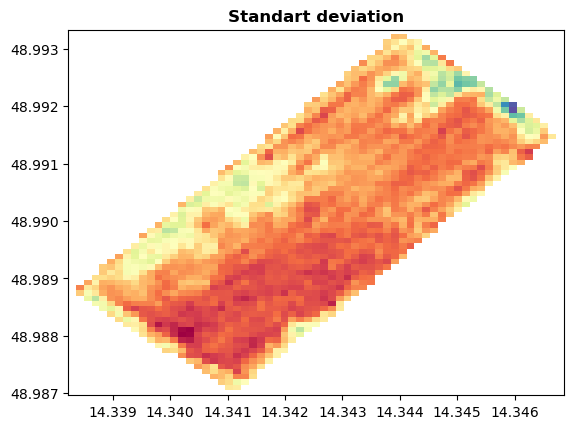

<AxesSubplot:title={'center':'Standart deviation'}>

In [15]:
# Load the first image again (cause we need to create profile for mean_image)
image_2018_path = r"vraz_wheat_2018-05-26_EVI.tiff"
with rasterio.open(image_2018_path) as image_2018_for_mean:
    image_2018_array = image_2018_for_mean.read()  
    profile_2018 = image_2018_for_mean.profile  

# Remove the extra dimension so we can show the images
image_mean = np.squeeze(image_mean)  # converts the shape to (70, 63)
image_std_dev = np.squeeze(image_std_dev)

# MEAN
# Update the profile for the mean image
profile_mean = profile_2018.copy()  # Create the profile by copying the first profile
profile_mean.update({
    'count': 1,  # Set to 1 because mean has one band ("band" je myšlen "kanál")
    'dtype': 'float32',  # Update dtype to float 
})

# Write the mean image to a new raster file
mean_image_path = r"mean_image.tiff"
with rasterio.open(mean_image_path, 'w', **profile_mean) as dst:
    dst.write(image_mean.astype('float32'), 1)  # Write the mean array to the first band

# Open the mean image for showing
mean_image = r"mean_image.tiff"
mean_image = rasterio.open(mean_image)

# STANDART DEVIATION
# Update the profile for the standart dev image
profile_std_dev = profile_2018.copy()  # Create the profile by copying the first profile
profile_std_dev.update({
    'count': 1,  # Set to 1 because mean has one band
    'dtype': 'float32',  # Update dtype to float 
    'nodata': 0, # add "nodata" for better visualization
})

# Write the standart dev image to a new raster file
std_dev_image_path = r"std_dev_image.tiff"
with rasterio.open(std_dev_image_path, 'w', **profile_std_dev) as dst:
    dst.write(image_std_dev.astype('float32'), 1)  # Write the mean array to the first band

# Open the standart dev image for showing
std_dev_image = r"std_dev_image.tiff"
std_dev_image = rasterio.open(std_dev_image)

# SHOW
show(mean_image, cmap='Spectral', title = 'Average') 
show(std_dev_image, cmap='Spectral', title = 'Standart deviation') 

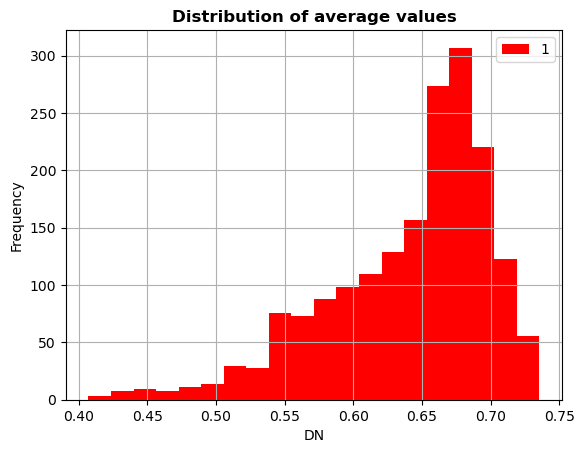

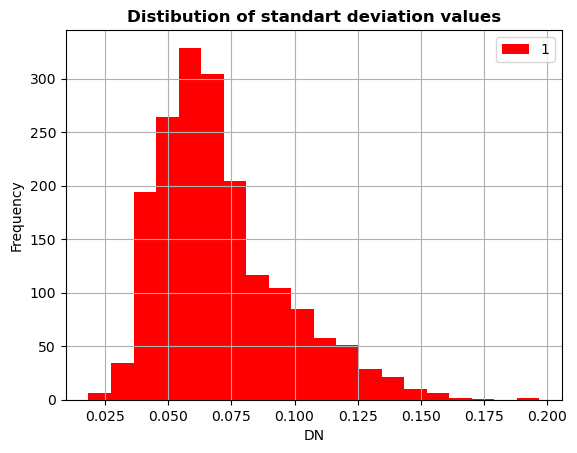

In [16]:
show_hist(mean_image,bins=20, title="Distribution of average values")
show_hist(std_dev_image,bins=20, title = 'Distibution of standart deviation values')

### Visualize initial data, mean and standart deviation

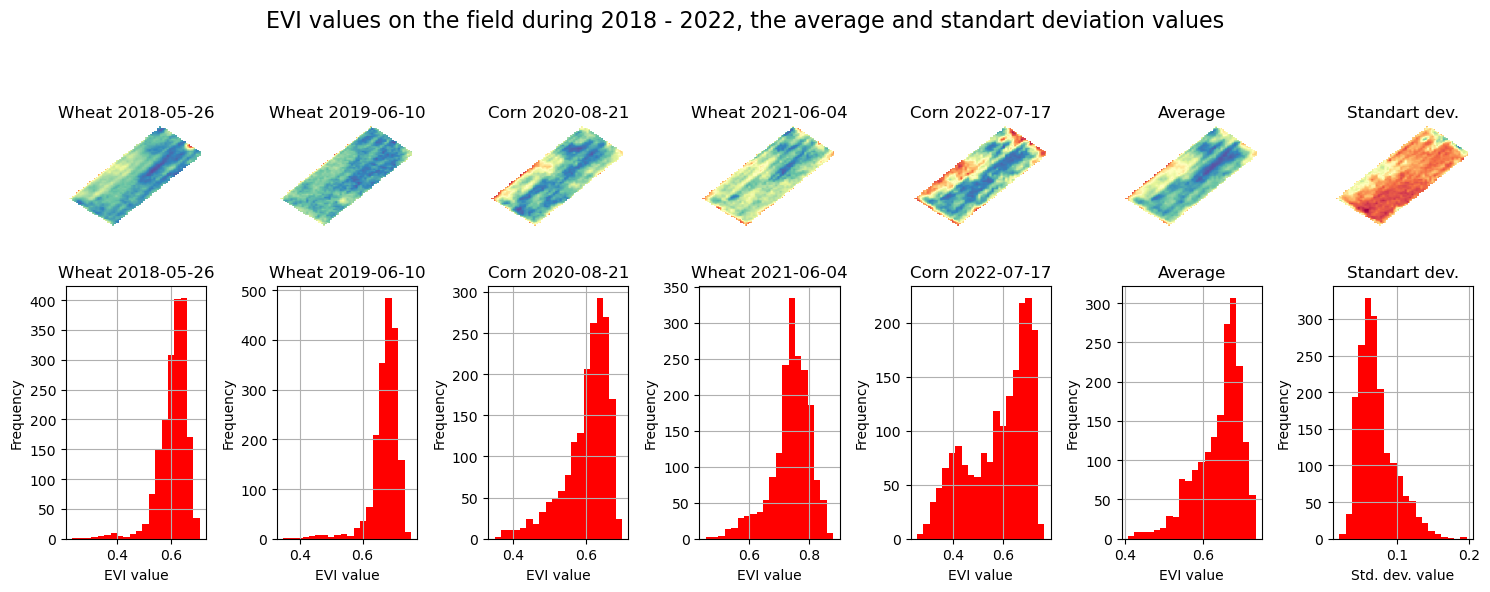

In [17]:
# Create a figure with subplots
fig, ax = plt.subplots(2, 7, figsize=(15, 6))  

# show images, set titles
show(image_2018, ax=ax[0,0], cmap='Spectral') 
show(image_2019, ax=ax[0,1], cmap='Spectral') 
show(image_2020, ax=ax[0,2], cmap='Spectral') 
show(image_2021, ax=ax[0,3], cmap='Spectral') 
show(image_2022, ax=ax[0,4], cmap='Spectral')
show(mean_image, ax=ax[0,5], cmap='Spectral')
show(std_dev_image, ax=ax[0,6], cmap='Spectral')
ax[0,0].set_title('Wheat 2018-05-26')
ax[0,0].axis('off')
ax[0,1].set_title('Wheat 2019-06-10')
ax[0,1].axis('off')
ax[0,2].set_title('Corn 2020-08-21')
ax[0,2].axis('off')
ax[0,3].set_title('Wheat 2021-06-04')
ax[0,3].axis('off')
ax[0,4].set_title('Corn 2022-07-17')
ax[0,4].axis('off')
ax[0,5].set_title('Average')
ax[0,5].axis('off')
ax[0,6].set_title('Standart dev.')
ax[0,6].axis('off')

# show histograms
show_hist(image_2018, ax=ax[1,0],bins=20)
show_hist(image_2019, ax=ax[1,1],bins=20)
show_hist(image_2020, ax=ax[1,2],bins=20)
show_hist(image_2021, ax=ax[1,3],bins=20)
show_hist(image_2022, ax=ax[1,4],bins=20)
show_hist(mean_image, ax=ax[1,5],bins=20)
show_hist(std_dev_image, ax=ax[1,6],bins=20)

# set title to histograms and change legend position (can't do globaly in rasterio:()
ax[1,0].set_title('Wheat 2018-05-26')
ax[1,0].legend().set_visible(False)
ax[1,0].set_xlabel('EVI value')
ax[1,1].set_title('Wheat 2019-06-10')
ax[1,1].legend().set_visible(False) 
ax[1,1].set_xlabel('EVI value')
ax[1,2].set_title('Corn 2020-08-21')
ax[1,2].legend().set_visible(False) 
ax[1,2].set_xlabel('EVI value')
ax[1,3].set_title('Wheat 2021-06-04')
ax[1,3].legend().set_visible(False) 
ax[1,3].set_xlabel('EVI value')
ax[1,4].set_title('Corn 2022-07-17')
ax[1,4].legend().set_visible(False)
ax[1,4].set_xlabel('EVI value')
ax[1,5].set_title('Average')
ax[1,5].legend().set_visible(False) 
ax[1,5].set_xlabel('EVI value')
ax[1,6].set_title('Standart dev.')
ax[1,6].legend().set_visible(False) 
ax[1,6].set_xlabel('Std. dev. value')

# title
fig.suptitle('EVI values on the field during 2018 - 2022, the average and standart deviation values', fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()

## Clasification

### K-Means clustering

In [18]:
# Define colors 
my_color_map = ['green', 'orange', 'blue', 'red', 'yellow']

# CLUSTERING (KMeans)
# Don't consider invalid values
invalid_value = -998
mask = image_mean != invalid_value  # Create mask
valid_pixels = image_mean[mask].reshape(-1, 1)  # Apply mask

# KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(valid_pixels)

# Reshape the clustered labels back to the original array shape
clustered_image = np.full_like(image_mean, fill_value=np.nan)
clustered_image[mask] = kmeans.labels_

# Get cluster centers and their associated colors
cluster_centers = kmeans.cluster_centers_.flatten()  
sorted_indices = np.argsort(cluster_centers)  # Get indices to sort the array
sorted_centers = cluster_centers[sorted_indices]
sorted_colors = [my_color_map[i] for i in sorted_indices]

# Define intervals between sorted cluster centers
intervals = []
for i in range(len(sorted_centers) - 1):
    lower_bound = (sorted_centers[i] + sorted_centers[i - 1]) / 2 if i > 0 else sorted_centers[i]
    upper_bound = (sorted_centers[i] + sorted_centers[i + 1]) / 2
    intervals.append((lower_bound, upper_bound))

intervals.append(((sorted_centers[-2] + sorted_centers[-1]) / 2, sorted_centers[-1]))

# Create a mapping from original to sorted cluster labels
label_map = {original: sorted_idx for sorted_idx, original in enumerate(sorted_indices)}

# Apply the label mapping to `clustered_image`
sorted_clustered_image = np.full_like(clustered_image, fill_value=np.nan)
for original, new in label_map.items():
    sorted_clustered_image[clustered_image == original] = new

sorted_clustered_image += 1 # add 1 so the color bar range is 1 to 5 (and not 0 to 4)

# Create a sorted color map
sorted_cmap = ListedColormap(sorted_colors)

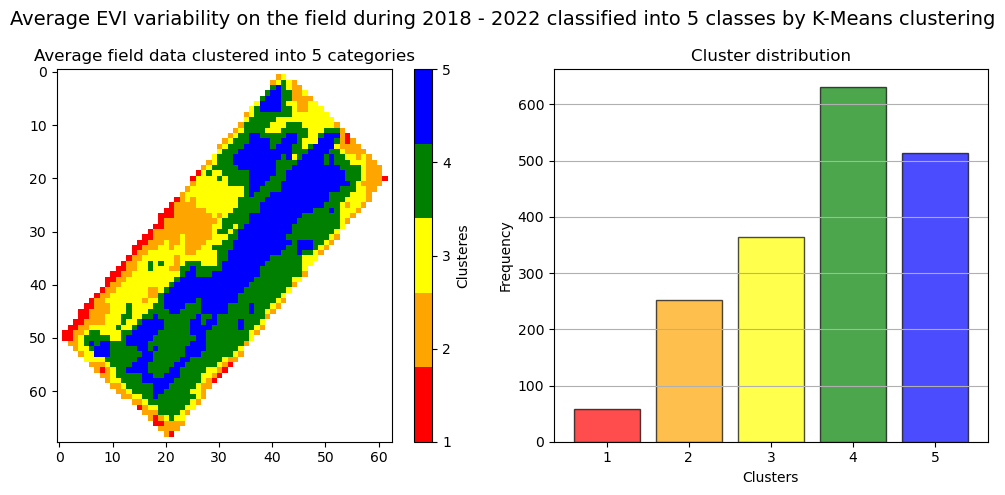

In [19]:
# VISUALIZE
fig, ax = plt.subplots(1,2, figsize = (10,5))

# cluster data image
image = ax[0].imshow(sorted_clustered_image, cmap=sorted_cmap, vmin = 1, vmax = 5)
ax[0].set_title('Average field data clustered into 5 categories')

# Color bar
cbar = fig.colorbar(image, ax=ax[0], pad=0.05, ticks=range(1, 6))
cbar.ax.set_yticklabels(range(1,6))
cbar.set_label('Clusteres')

# histogram
unique, counts = np.unique(sorted_clustered_image[mask], return_counts=True)  # Get unique cluster labels and their counts
colors = [sorted_colors[int(label)-1] for label in unique] # "-1" to match the 1 to 5 range (and not 0 to 4) 

ax[1].bar(unique, counts, color=colors, edgecolor='black', alpha=0.7)
ax[1].set_title('Cluster distribution')
ax[1].set_xlabel('Clusters')
ax[1].set_ylabel('Frequency')
ax[1].set_xticks(unique)  # Set x-ticks to be the unique cluster labels
ax[1].grid(axis='y')

# title
fig.suptitle('Average EVI variability on the field during 2018 - 2022 classified into 5 classes by K-Means clustering', fontsize=14)

plt.tight_layout()  
plt.show()

#### Print cluster with corresponding colors

In [20]:
# Define intervals between sorted cluster centers
intervals = []
for i in range(len(sorted_centers) - 1):
    lower_bound = (sorted_centers[i] + sorted_centers[i - 1]) / 2 if i > 0 else sorted_centers[i]
    upper_bound = (sorted_centers[i] + sorted_centers[i + 1]) / 2
    intervals.append((lower_bound, upper_bound))

# Add the final interval covering the upper bound of the last cluster
intervals.append(((sorted_centers[-2] + sorted_centers[-1]) / 2, sorted_centers[-1]))

# Print intervals with rounded values
print("Cluster Intervals and Colors (K-Means clustering):")
for i, (interval, color) in enumerate(zip(intervals, sorted_colors), start=1):
    rounded_interval = (round(interval[0], 3), round(interval[1], 3))  # Round each bound to 3 decimals
    print(f"Cluster {i}: Interval = {rounded_interval}, Color = {color}")

Cluster Intervals and Colors (K-Means clustering):
Cluster 1: Interval = (0.471, 0.512), Color = red
Cluster 2: Interval = (0.512, 0.582), Color = orange
Cluster 3: Interval = (0.582, 0.636), Color = yellow
Cluster 4: Interval = (0.636, 0.68), Color = green
Cluster 5: Interval = (0.68, 0.699), Color = blue


### Vizualize and save just the clustered image 

C:\anakonda\lib\site-packages\rasterio\__init__.py:396: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


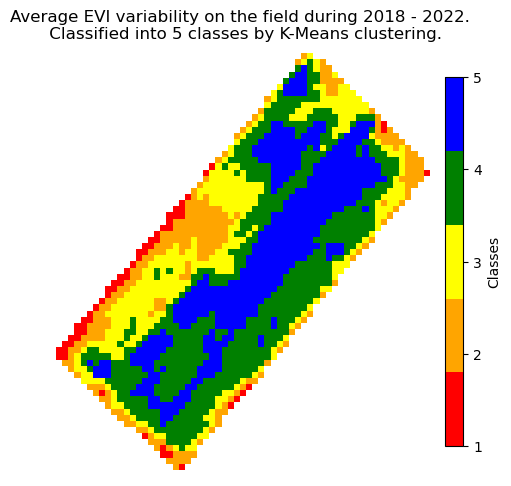

In [21]:
# VISUALIZE
fig, ax = plt.subplots(figsize=(6, 6))

# Display clustered image
image = ax.imshow(sorted_clustered_image, cmap=sorted_cmap, vmin=1, vmax=5)
ax.axis('off')  # Hide the axes for clean visualization
ax.set_title('Average EVI variability on the field during 2018 - 2022. \n Classified into 5 classes by K-Means clustering.')

# Add colorbar with 1 to 5 ticks
cbar = fig.colorbar(image, ax=ax, pad=0.02, shrink=0.8, ticks=range(1, 6))
cbar.ax.set_yticklabels(range(1, 6))
cbar.set_label('Classes')

# Save plot as a TIFF file
fig.savefig('clustered_image.tiff', dpi=300, bbox_inches='tight', pad_inches=0.1)

# Save only the clustered data array as a TIFF
with rasterio.open(
    'clustered_image_data.tiff', 'w',
    driver='GTiff', 
    height=sorted_clustered_image.shape[0],
    width=sorted_clustered_image.shape[1],
    count=1,  # Single band
    dtype=sorted_clustered_image.dtype,
    crs='+proj=latlong',
    transform=from_origin(0, 0, 1, 1)  # Set transform (change as needed)
) as dst:
    dst.write(sorted_clustered_image, 1)

plt.show()

### Equal interval binning
- from min value 0.47 to max value 0.7 equal interval binning

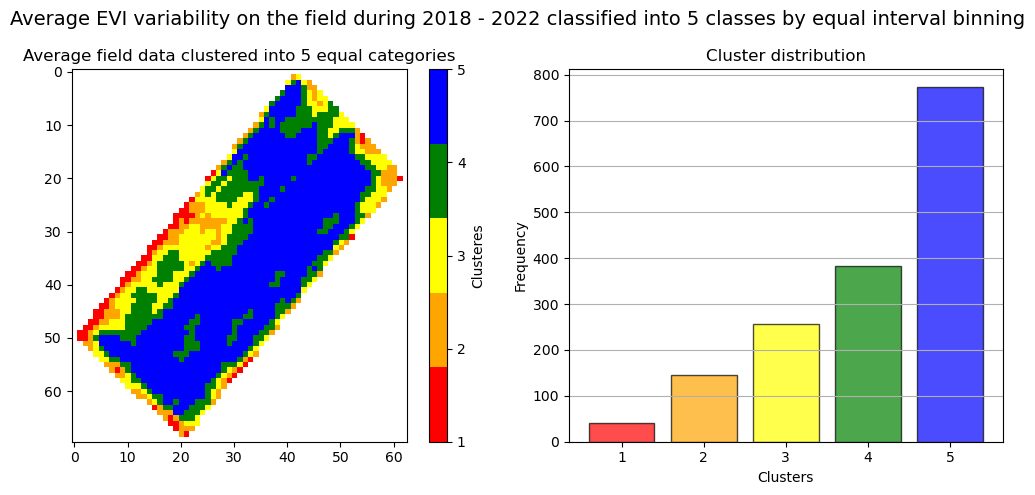

In [22]:
# Define color map for the 5 equal bins
my_color_map = ['red', 'orange', 'yellow', 'green', 'blue']
sorted_cmap = ListedColormap(my_color_map)

# Define bins
bins = np.array([0.47, 0.516, 0.562, 0.608, 0.654, 0.7])

# Don't consider invalid values (-998 in this case)
invalid_value = -998
mask = image_mean != invalid_value  # Create mask to exclude invalid values

# Extract valid pixels as a 1D array
valid_pixels = image_mean[mask]  

# Apply binning to the valid pixels
binned_labels = np.digitize(valid_pixels, bins)  # Bins will label from 1 to 5

# Reshape the binned labels back to the original array shape
clustered_image = np.full_like(image_mean, fill_value=np.nan)
clustered_image[mask] = binned_labels  # Place binned labels in masked areas

# VISUALIZE
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Display the binned data image
image = ax[0].imshow(clustered_image, cmap=sorted_cmap, vmin=1, vmax=5)
ax[0].set_title('Average field data clustered into 5 equal categories')

# Color bar
cbar = fig.colorbar(image, ax=ax[0], pad=0.05, ticks=range(1, 6))
cbar.ax.set_yticklabels(range(1,6))
cbar.set_label('Clusteres')

# Create histogram counts for each bin directly using np.histogram
hist_counts, bin_edges = np.histogram(valid_pixels, bins=bins)  # Get counts per bin

# Create x values for histogram bars
bin_labels = np.arange(1, len(hist_counts) + 1)  # 1 to 5 for bins

# Plot histogram bars
ax[1].bar(bin_labels, hist_counts, color=my_color_map, edgecolor='black', alpha=0.7)
ax[1].set_title('Cluster distribution')
ax[1].set_xlabel('Clusters')
ax[1].set_ylabel('Frequency')
ax[1].set_xticks(bin_labels)  # Set x-ticks to the bin labels (1 to 5)
ax[1].grid(axis='y')


fig.suptitle('Average EVI variability on the field during 2018 - 2022 classified into 5 classes by equal interval binning', fontsize=14)
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()




In [23]:
print("Equal cluster intervals (size 0.046):")
for i in range(len(bins) - 1):
    print(f"Cluster {i + 1}: {bins[i]:.2f} to {bins[i + 1]:.2f}")

Equal cluster intervals (size 0.046):
Cluster 1: 0.47 to 0.52
Cluster 2: 0.52 to 0.56
Cluster 3: 0.56 to 0.61
Cluster 4: 0.61 to 0.65
Cluster 5: 0.65 to 0.70


In [24]:
print("Cluster intervals and colors (equal interval binning, size 0.046):")
print("Cluster 1: Interval = (0.47 to 0.52), color = red")
print("Cluster 2: Interval = (0.52 to 0.56), color = orange")
print("Cluster 3: Interval = (0.56 to 0.61), color = yellow")
print("Cluster 4: Interval = (0.61 to 0.65), color = green")
print("Cluster 5: Interval = (0.65 to 0.70), color = blue")

Cluster intervals and colors (equal interval binning, size 0.046):
Cluster 1: Interval = (0.47 to 0.52), color = red
Cluster 2: Interval = (0.52 to 0.56), color = orange
Cluster 3: Interval = (0.56 to 0.61), color = yellow
Cluster 4: Interval = (0.61 to 0.65), color = green
Cluster 5: Interval = (0.65 to 0.70), color = blue


## Additions

### Add average image data to the table

In [25]:
# create a data frame
array_statistics_df = pd.DataFrame(columns=['Min', 'Max', 'Mean', 'Std Dev'])

# arrays to go through
arrays = [image_2018_array, image_2019_array, image_2020_array, image_2021_array, image_2022_array, image_mean_to_table]

# go through arrays, return data
for i, array in enumerate(arrays):
    array_min, array_max, array_mean, array_st_dev = array_data_exploration(array)
    array_statistics_df.loc[i] = [array_min, array_max, array_mean, array_st_dev]

# rename index
new_index_names = ['2018 - wheat', '2019 - wheat', '2020 - corn', '2021 - wheat', '2022 - corn', 'Average']
array_statistics_df.index = new_index_names

# pivot table
array_statistics_df = array_statistics_df.T 

# round values
array_statistics_df = array_statistics_df.round(3)

array_statistics_df

,2018 - wheat,2019 - wheat,2020 - corn,2021 - wheat,2022 - corn,Average
Min,0.233,0.346,0.349,0.454,0.254,0.407
Max,0.706,0.755,0.698,0.882,0.766,0.736
Mean,0.608,0.672,0.602,0.740,0.582,0.641
Std Dev,0.055,0.045,0.062,0.066,0.124,0.059
